# Deciding the Data Parameters

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations, product
from matplotlib.lines import Line2D

from param import *
from util import cal_inter_clusters_distance, cal_within_clusters_distance, cal_inter_clusters_similarity, cal_within_clusters_similarity

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

## K-means

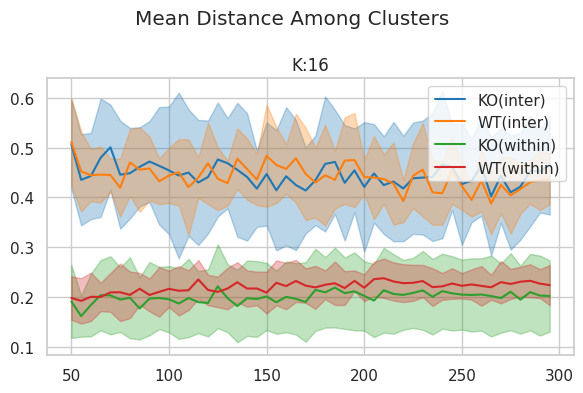

In [5]:
result_org = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_k_means_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    for result in result_all:
        if "KO" in data_name:
            result_org.append((
                cal_inter_clusters_distance(result['estimator'].cluster_centers_), 
                cal_within_clusters_distance(result['estimator'].inertia_, result["X_shape"]), 
                result["K"], 
                result["num_kernels"], 
                "KO"))
        else:
            result_org.append((
                cal_inter_clusters_distance(result['estimator'].cluster_centers_),
                cal_within_clusters_distance(result['estimator'].inertia_, result["X_shape"]), 
                result["K"], 
                result["num_kernels"], 
                "WT"))

df = pd.DataFrame(result_org, columns=["inter_dis", "within_dis", "K", "num_kernels", "mouse_type"])
K_value = 16

fig, ax = plt.subplots(figsize=(6,4), sharey=True, tight_layout=True)

# ---- inter distance ----
xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].mean().loc["KO"]
KO_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].std().loc["KO"]
ax.plot(xx, label="KO(inter)", color="tab:blue")
ax.fill_between(xx.index, xx-KO_std, xx+KO_std, alpha=.3, color="tab:blue")

xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].mean().loc["WT"]
WT_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].std().loc["WT"]
ax.plot(xx, label="WT(inter)", color="tab:orange")
ax.fill_between(xx.index, xx-WT_std, xx+WT_std, alpha=.3, color="tab:orange")

# ---- within distance ----
xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].mean().loc["KO"]
KO_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].std().loc["KO"]
ax.plot(xx, label="KO(within)", color="tab:green")
ax.fill_between(xx.index, xx-KO_std, xx+KO_std, alpha=.3, color="tab:green")

xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].mean().loc["WT"]
WT_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].std().loc["WT"]
ax.plot(xx, label="WT(within)", color="tab:red")
ax.fill_between(xx.index, xx-WT_std, xx+WT_std, alpha=.3, color="tab:red")

ax.set_title(f"K:{K_value}")

plt.suptitle("Mean Distance Among Clusters")
plt.legend()


## Spectral Clustering

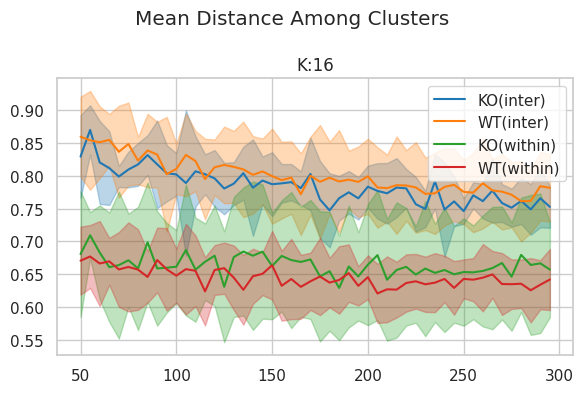

In [3]:
result_org = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    with open(ParamDir().output_dir/data_name/(f"tsc_tuning_spectral_small_scale.pickle"),"rb") as f:
        result_all = pickle.load(f)
    for result in result_all:
        if "KO" in data_name:
            result_org.append((
                cal_inter_clusters_similarity(result["estimator"].affinity_matrix_, result["estimator"].labels_), 
                cal_within_clusters_similarity(result["estimator"].affinity_matrix_, result["estimator"].labels_), 
                result["K"], 
                result["num_kernels"], 
                "KO"))
        else:
            result_org.append((
                cal_inter_clusters_similarity(result["estimator"].affinity_matrix_, result["estimator"].labels_),
                cal_within_clusters_similarity(result["estimator"].affinity_matrix_, result["estimator"].labels_), 
                result["K"], 
                result["num_kernels"], 
                "WT"))

df = pd.DataFrame(result_org, columns=["inter_dis", "within_dis", "K", "num_kernels", "mouse_type"])
K_value = 16

fig, ax = plt.subplots(figsize=(6,4), sharey=True, tight_layout=True)

# ---- inter distance ----
xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].mean().loc["KO"]
KO_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].std().loc["KO"]
ax.plot(xx, label="KO(inter)", color="tab:blue")
ax.fill_between(xx.index, xx-KO_std, xx+KO_std, alpha=.3, color="tab:blue")

xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].mean().loc["WT"]
WT_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["inter_dis"].std().loc["WT"]
ax.plot(xx, label="WT(inter)", color="tab:orange")
ax.fill_between(xx.index, xx-WT_std, xx+WT_std, alpha=.3, color="tab:orange")

# ---- within distance ----
xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].mean().loc["KO"]
KO_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].std().loc["KO"]
ax.plot(xx, label="KO(within)", color="tab:green")
ax.fill_between(xx.index, xx-KO_std, xx+KO_std, alpha=.3, color="tab:green")

xx = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].mean().loc["WT"]
WT_std = df[df["K"]==K_value].groupby(["mouse_type", "num_kernels"])["within_dis"].std().loc["WT"]
ax.plot(xx, label="WT(within)", color="tab:red")
ax.fill_between(xx.index, xx-WT_std, xx+WT_std, alpha=.3, color="tab:red")

ax.set_title(f"K:{K_value}")

plt.suptitle("Mean Distance Among Clusters")
plt.legend()
